In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype

# Load data
data = fetch_covtype()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# View previous lines
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0           238.0   

In [97]:
X = data.data  # Input features
y = data.target - 1  # tags, minus 1 to make it start from 0

In [98]:
# Divide the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

# X is the features and y is the classification label corresponding to those features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
# Create a future sample set from the test dataset
futureSample_data = X_test[-2:]  # Extract the last two samples
futureSample_label = y_test[-2:]  # Extract the corresponding tag

In [100]:
# Remove the last two samples from the test set
X_test = X_test[:-2]  # Updated X_test with the last two samples removed
y_test = y_test[:-2]  # Updated y_test with the last two tags removed

In [101]:
input_dim = X_train.shape[1]  # Dimension of the input layer, equal to the number of features in the training set

# neurons in three hidden layers
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256

output_dim = 7  # dimensions of the output layer, indicating 7 classifications

epochNo = 20  # training rounds
batchSize = 16  # Number of samples processed per batch

In [102]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

# Modelling
model = tf.keras.Sequential()
model.add(Input(shape=(input_dim,)))  # Input layer

# Add three hidden layers, using the ReLU activation function
model.add(Dense(n_neurons_1, activation='relu'))
model.add(Dense(n_neurons_2, activation='relu'))
model.add(Dense(n_neurons_3, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))  # Modify the output layer

In [103]:
# Outputs the length of model.layers, indicating the number of layers in the model.
print ('The model layers is {}: '.format(len(model.layers)))

The model layers is 4: 


In [104]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss=‘sparse_categorical_crossentropy’: loss function for multicategorical problems with labels of integer form (e.g. 0, 1, 2...).
# optimizer=‘adam’: use the Adam optimizer, which is a commonly used and well-performing optimisation algorithm.
# metrics=[‘accuracy’]: the accuracy of the model is calculated during training as an evaluation of the model's performance.

In [105]:
print(f"y_train min: {y_train.min()}, y_train max: {y_train.max()}")
print(f"y_test min: {y_test.min()}, y_test max: {y_test.max()}")

y_train min: 0, y_train max: 6
y_test min: 0, y_test max: 6


In [106]:
model.fit(X_train, y_train, epochs=epochNo, batch_size=batchSize, verbose=1)
# X_train, y_train: use training data for model training.
# epochs=epochNo: set the number of rounds for training, here use the epochNo defined before (e.g. 20 rounds).
# batch_size=batchSize: use batchSize (e.g. 16 samples) to update the weights of the model each time.
# verbose=1: set to 1 to display the detailed output of the training process.

Epoch 1/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.6168 - loss: 2.1165
Epoch 2/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.7113 - loss: 0.6641
Epoch 3/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - accuracy: 0.7300 - loss: 0.6289
Epoch 4/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.7348 - loss: 0.6162
Epoch 5/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 95s 3ms/step - accuracy: 0.7411 - loss: 0.6073
Epoch 6/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.7424 - loss: 0.6037
Epoch 7/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.7432 - loss: 0.5992
Epoch 8/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 104s 4ms/step - accuracy: 0.7460 - loss: 0.5935
Epoch 9/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.7495 - loss: 0.5864
Epoch 10/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.7483 - loss: 0.5909
Epoch 11/20
29051/29051 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.7493 - loss: 0.5

In [107]:
# Predict the output of the test set using method predict() from the model and determine the class labels using the argmax() method with parameter axis =1 
predictions = model.predict(X_test)
y_preds = predictions.argmax(axis=1)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step


In [108]:
scores = model.evaluate(X_test, y_test, verbose = 1) # first element is loss, second is accuracy
#X_test, y_test: input features and labels for the test set.
#verbose=1: output details of the evaluation process.
#scores[0]: indicates the loss value on the test set.
#scores[1]: indicates the accuracy on the test set.

print(scores)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step - accuracy: 0.7547 - loss: 0.5819
[0.5853517055511475, 0.7516716718673706]


In [111]:
# import metrics from sklearn for calculation of evaluation metrics, such as accuracy, precision, recall and f1-score
from sklearn import metrics

In [112]:
# Calculate the accuracy between the predicted value y_preds and the true label y_test
accuracy_test = metrics.accuracy_score(y_preds, y_test)

print (accuracy_test)

0.7516716723608231


In [113]:
precision_test = metrics.precision_score(y_test, y_preds, average='weighted')

print(precision_test)

0.75602139478051


In [114]:
recall_test = metrics.recall_score(y_test, y_preds, average='weighted')

print(recall_test)

0.7516716723608231


In [115]:
f1_score_test = metrics.f1_score(y_test, y_preds, average='weighted')

print(f1_score_test)

0.74756814209336


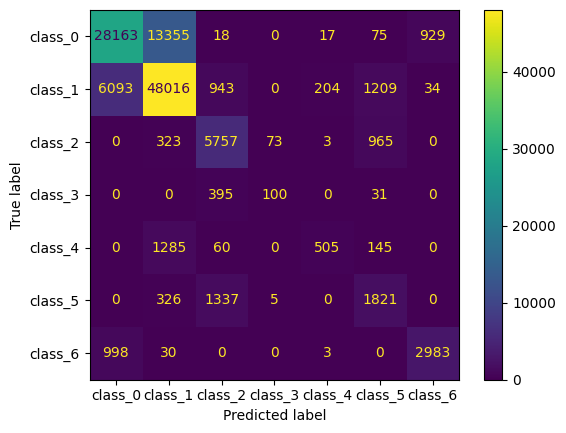

In [116]:
# Calculate the confusion matrix between true labels (y_test) and predicted labels (y_preds)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6'])
cmp.plot()
plt.show()  # Ensure graphical display

In [117]:
# Display the evaluation report
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72     42557
           1       0.76      0.85      0.80     56499
           2       0.68      0.81      0.74      7121
           3       0.56      0.19      0.28       526
           4       0.69      0.25      0.37      1995
           5       0.43      0.52      0.47      3489
           6       0.76      0.74      0.75      4014

    accuracy                           0.75    116201
   macro avg       0.67      0.58      0.59    116201
weighted avg       0.76      0.75      0.75    116201



In [118]:
# Save the trained model as a file so that it can be reloaded and used in the future
from tensorflow.keras.models import load_model

model.save("model.h5")

In [119]:
loaded_model = load_model ('model.h5')

In [120]:
loaded_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 1024)           │        56,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 714,249 (2.72 MB)

 Trainable params: 714,247 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [121]:
# The specific eigenvalues of these samples can be viewed in order to understand the input form of these samples
print(futureSample_data)

[[2.991e+03 1.590e+02 1.300e+01 4.020e+02 7.500e+01 5.434e+03 2.330e+02
  2.420e+02 1.370e+02 1.504e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [3.409e+03 1.910e+02 1.400e+01 6.040e+02 1.170e+02 4.277e+03 2.180e+02
  2.500e+02 1.620e+02 2.809e+03 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00

In [123]:
# Predict the output for the future samples using method predict() from the loaded model, loaded_model
predictions_val = loaded_model.predict(futureSample_data)
y_preds_val = predictions_val.argmax(axis=1)
print("The predicted classes are {} vs the true classes are {}".format(y_preds_val, futureSample_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The predicted classes are [1 6] vs the true classes are [1 6]
